In [1]:
import pandas as pd 
from keras.models import Sequential
from keras.layers import Dense
import numpy
import keras
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# For Gas Turbines Dataset

In [2]:
gasturbines=pd.read_csv("C:/Users/icon/Downloads/gas_turbines.csv")
gasturbines

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

In [3]:
gasturbines[gasturbines.duplicated()]

Empty DataFrame
Columns: [AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP, CO, NOX]
Index: []

In [4]:
gasturbines.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   

           TEY       CDP        CO       NOX  
AT   -0.207495 -0.100705 -0.088588 -0.600006  
AP    0.146939  0.131198  0.041614  0.256744  
AH   -0.110272 -0.182010  0.165505  0.143061  
AFDP  0.717995  0.727152 -0.334207 -0.037299  
GTEP  0.977042  0.993784 -0.508259 -0.208496  
TIT   0.891587  0.887238 -0.688272 -0.231636  
TAT  -0.720356 -0.744740  0.063404  0.009888  
TEY   1.000000  0.988473 -0.541751 -0.102631  
CDP   0.988473  1.000000 -0.520783 -0.169103  
CO   -0.541751 -0.520783  1.000000  0.316743  
NOX  -0.102631 -0.169103  0.316743  1.000000

In [5]:
gasturbines.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
gasturbines.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

## Visualization

In [7]:
import seaborn as sns 

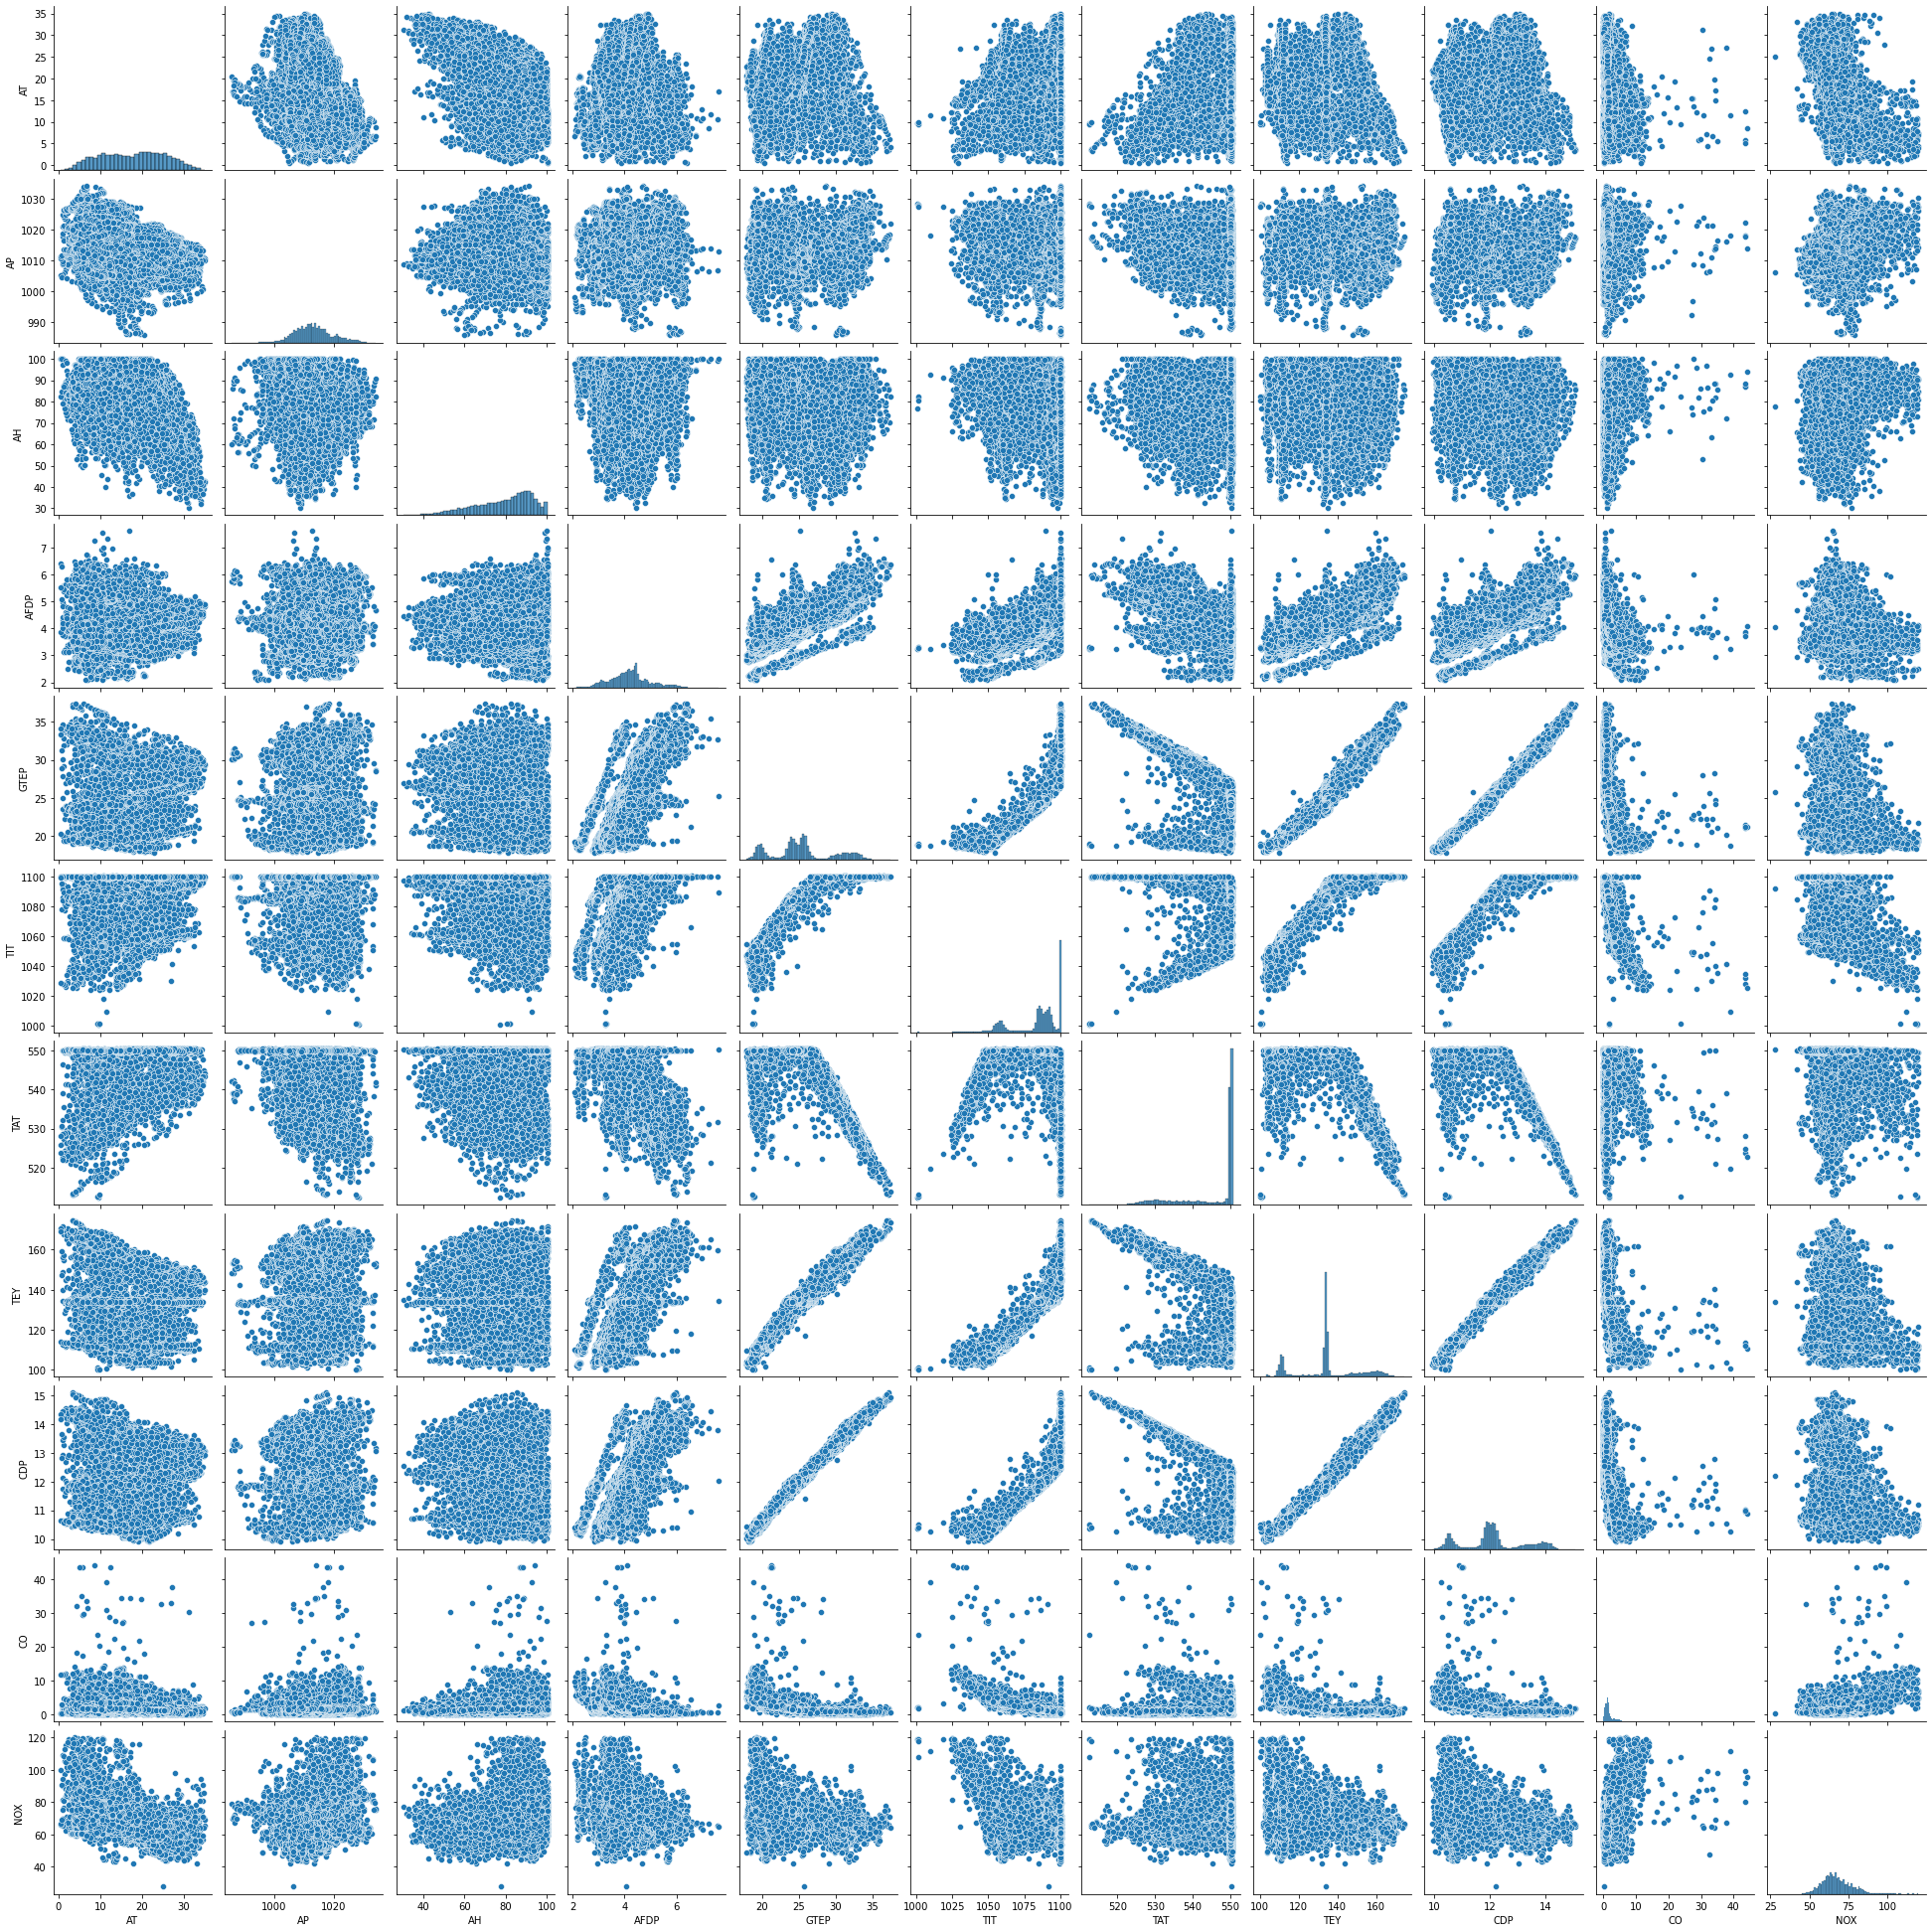

In [8]:
sns.pairplot(gasturbines)

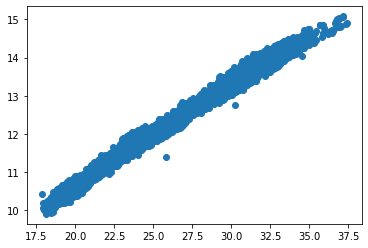

In [9]:
import matplotlib.pyplot as plt
plt.scatter(gasturbines['GTEP'],gasturbines['CDP'])

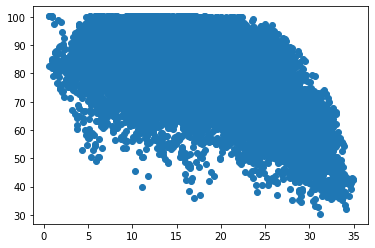

In [10]:
import matplotlib.pyplot as plt
plt.scatter(gasturbines['AT'],gasturbines['AH'])

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GTEP', ylabel='Density'>

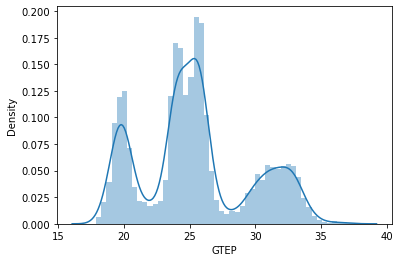

In [11]:
import seaborn as sns
sns.distplot(gasturbines['GTEP'])

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AT', ylabel='Density'>

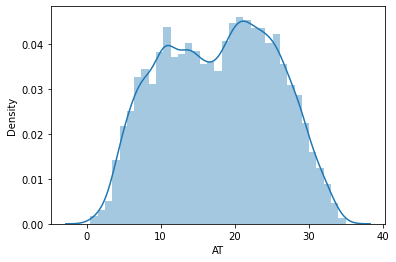

In [12]:
import seaborn as sns
sns.distplot(gasturbines['AT'])

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GTEP', ylabel='CDP'>

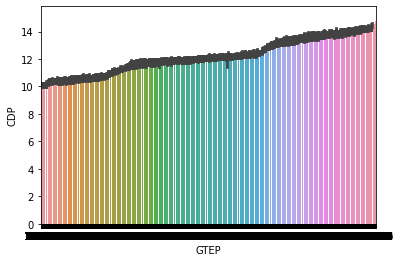

In [13]:
import seaborn as sns
sns.barplot(gasturbines.GTEP,gasturbines.CDP)

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AT'>

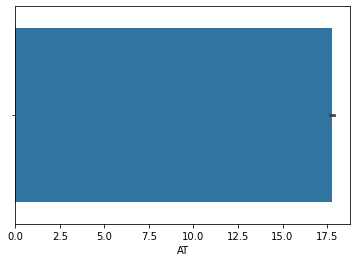

In [14]:
import seaborn as sns
sns.barplot(gasturbines.AT)

In [15]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [16]:
# split into input (X) and output (Y) variables
x=gasturbines.drop(['TEY'],axis=1)
y=gasturbines.iloc[:,7]

In [17]:
x

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.722  
1      82.776  
2      82.468  
3      82.670  
4      82.311  
...       ...  
15034  79.559  
15035  79.917  
15036  90.912  
15037  93.227  
15038  92.498  

[15039 rows x 10 columns]

In [18]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [19]:
# create model
model = Sequential()
model.add(Dense(25, input_dim=10,  activation='relu')) #1st layer
model.add(Dense(25, activation='sigmoid')) #2rd layer or op layer
model.add(Dense(25, activation='tanh')) #3rd layer
model.add(Dense(25, activation='leaky_relu')) #4rd layer

In [20]:
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_percentage_error'])
model
# loss depends upon categorical and numerical function

In [21]:
15039*0.67

10076.130000000001

In [22]:
# Fit the model
history = model.fit(x, y, validation_split=0.33, epochs=20, batch_size=10)

Epoch 1/20
1008/1008 [==============================] - 7s 6ms/step - loss: 14948.9111 - mean_absolute_percentage_error: 89.2291 - val_loss: 11202.8379 - val_mean_absolute_percentage_error: 79.0950
Epoch 2/20
1008/1008 [==============================] - 5s 5ms/step - loss: 9578.7852 - mean_absolute_percentage_error: 70.8123 - val_loss: 6886.6719 - val_mean_absolute_percentage_error: 61.2980
Epoch 3/20
1008/1008 [==============================] - 4s 4ms/step - loss: 5800.4492 - mean_absolute_percentage_error: 54.2219 - val_loss: 3888.2236 - val_mean_absolute_percentage_error: 45.0804
Epoch 4/20
1008/1008 [==============================] - 4s 4ms/step - loss: 3214.5325 - mean_absolute_percentage_error: 39.1195 - val_loss: 1945.4062 - val_mean_absolute_percentage_error: 30.4269
Epoch 5/20
1008/1008 [==============================] - 3s 3ms/step - loss: 1587.5995 - mean_absolute_percentage_error: 25.6808 - val_loss: 842.3261 - val_mean_absolute_percentage_error: 17.7616
Epoch 6/20
1008/100

In [23]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]))

470/470 [==============================] - 1s 3ms/step - loss: 251.1320 - mean_absolute_percentage_error: 8.7399
mean_absolute_percentage_error: 8.74%


In [24]:
model.metrics_names

['loss', 'mean_absolute_percentage_error']

In [25]:
scores

[251.1320037841797, 8.73987102508545]

In [26]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

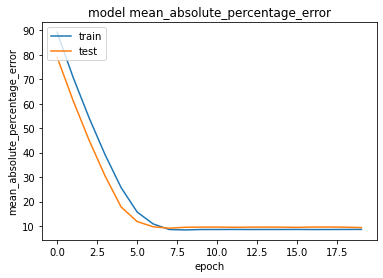

In [27]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model mean_absolute_percentage_error')
plt.ylabel('mean_absolute_percentage_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

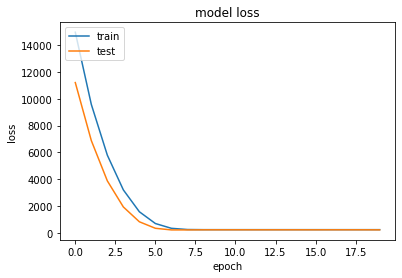

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()